In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import sys, os, time, collections

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'cells'))
# sys.path.append(os.path.join(os.environ['REPO_DIR'], 'annotation'))
# sys.path.append(os.path.join(os.environ['REPO_DIR']bb, 'learning'))

import numpy as np
import scipy
import skimage
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from skimage.measure import regionprops, label, find_contours
from skimage.color import rgb2hsv
from scipy import ndimage as ndi
import pandas
from scipy.signal import argrelmax
from scipy.stats import linregress

from annotation_utilities import *
from registration_utilities import *
from learning_utilities import *
from data_manager import *
from utilities2015 import *
from cell_utilities import *
from metadata import *
from distributed_utilities import download_from_s3

save_folder_path = '/shared/MouseBrainAtlasXiang/XJ/Output/Collect_typical_blobs/'
from xj_utilities import *
fun_create_folder(save_folder_path=save_folder_path)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk


Setting environment for AWS compute node
rm -rf "/shared/CSHL_data_processed/MD585/MD585_sorted_filenames.txt" && mkdir -p "/shared/CSHL_data_processed/MD585"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_sorted_filenames.txt" "/shared/CSHL_data_processed/MD585/MD585_sorted_filenames.txt"
rm -rf "/shared/CSHL_data_processed/MD585/MD585_anchor.txt" && mkdir -p "/shared/CSHL_data_processed/MD585"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_anchor.txt" "/shared/CSHL_data_processed/MD585/MD585_anchor.txt"
rm -rf "/shared/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt" && mkdir -p "/shared/CSHL_data_processed/MD585"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt" "/shared/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt"
rm -rf "/shared/CSHL_data_processed/MD589

rm -rf "/shared/CSHL_data_processed/MD599/MD599_sorted_filenames.txt" && mkdir -p "/shared/CSHL_data_processed/MD599"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD599/MD599_sorted_filenames.txt" "/shared/CSHL_data_processed/MD599/MD599_sorted_filenames.txt"
rm -rf "/shared/CSHL_data_processed/MD599/MD599_anchor.txt" && mkdir -p "/shared/CSHL_data_processed/MD599"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD599/MD599_anchor.txt" "/shared/CSHL_data_processed/MD599/MD599_anchor.txt"
rm -rf "/shared/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropbox.txt" && mkdir -p "/shared/CSHL_data_processed/MD599"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropbox.txt" "/shared/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropbox.txt"
rm -rf "/shared/CSHL_data_processed/MD602/MD602_sorted_filenames.txt" && mkd

rm -rf "/shared/CSHL_data_processed/MD661/MD661_sorted_filenames.txt" && mkdir -p "/shared/CSHL_data_processed/MD661"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_sorted_filenames.txt" "/shared/CSHL_data_processed/MD661/MD661_sorted_filenames.txt"
rm -rf "/shared/CSHL_data_processed/MD661/MD661_anchor.txt" && mkdir -p "/shared/CSHL_data_processed/MD661"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_anchor.txt" "/shared/CSHL_data_processed/MD661/MD661_anchor.txt"
rm -rf "/shared/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_cropbox.txt" && mkdir -p "/shared/CSHL_data_processed/MD661"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_cropbox.txt" "/shared/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_cropbox.txt"
rm -rf "/shared/CSHL_data_processed/MD662/MD662_sorted_filenames.tx

rm -rf "/shared/CSHL_data_processed/MD652/MD652_prep2_thumbnail/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_thumbnail.tif" && mkdir -p "/shared/CSHL_data_processed/MD652/MD652_prep2_thumbnail"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_prep2_thumbnail/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_thumbnail.tif" "/shared/CSHL_data_processed/MD652/MD652_prep2_thumbnail/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_thumbnail.tif"
rm -rf "/shared/CSHL_data_processed/MD642/MD642_prep2_thumbnail/MD642-N14-2017.01.18-16.25.58_MD642_2_0041_prep2_thumbnail.tif" && mkdir -p "/shared/CSHL_data_processed/MD642/MD642_prep2_thumbnail"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_prep2_thumbnail/MD642-N14-2017.01.18-16.25.58_MD642_2_0041_prep2_thumbnail.tif" "/shared/CSHL_data_processed/MD642/MD642_prep2_thumbnail/MD642-N14-2017.01.18-16.25.58_MD642_2_0041_prep2_thumbnail.tif"
rm -rf "/shared/CSHL_data_processed/MD657/MD657_prep2_thumbnail/

Cannot import mxnet.
Folder created: /shared/MouseBrainAtlasXiang/XJ/Output/Collect_typical_blobs/

'/shared/MouseBrainAtlasXiang/XJ/Output/Collect_typical_blobs/'

In [4]:
def fun_similar_ratio(data, threshold_simu):
    return np.float(np.count_nonzero(data>threshold_simu))/len(data)
def fun_max_similarity_with_plot(positive_data, negative_data, plotFig=False):
    tempPosCum = []
    tempNegCum = []
    tempRanges = np.arange(0,1.05,0.05)
    for threshold_simu in tempRanges:
        tempPosCum.append(fun_similar_ratio(positive_data, threshold_simu=threshold_simu))
        tempNegCum.append(fun_similar_ratio(negative_data, threshold_simu=threshold_simu))

    tempDifference = np.array(tempPosCum) - np.array(tempNegCum)
    tempMax = np.max(tempDifference)
    tempPos = tempRanges[tempDifference==tempMax]
    if plotFig:
        plt.figure()
        plt.plot(tempRanges, tempPosCum, label='Positive')
        plt.plot(tempRanges, tempNegCum, label='Negative')
        plt.plot(tempRanges, tempDifference, label='Difference')
        plt.xlabel('Threshold Similarity')
        plt.title('Max difference = %f @ s=%f'%(tempMax,tempPos))
        plt.grid()
        plt.legend()
    return tempPos, tempMax

def fun_ROC(positive_data, negative_data):
    """ Input: positive_data, negative_data are 1D numpy.array
    Output: simMax, maxDiff, ranges, posCum, negCum"""
    tempPosCum = []
    tempNegCum = []
    tempRanges = np.arange(0,1.05,0.05)
    for threshold_simu in tempRanges:
        tempPosCum.append(fun_similar_ratio(positive_data, threshold_simu=threshold_simu))
        tempNegCum.append(fun_similar_ratio(negative_data, threshold_simu=threshold_simu))
    return tempRanges, tempPosCum, tempNegCum

def fun_find_max(x,y, mode='returnAll'):
    x = np.array(x)
    y = np.array(y)
    maxY = np.max(y)
    maxX = x[y == maxY]
    if mode == 'returnAll':
        return maxX, maxY
    elif mode == 'returnFirst':
        if type(maxX) == np.ndarray:
            return maxX[0], maxY

def fun_find_max_similarity_difference(data_range, posCum, negCum):
    difference = np.array(posCum) - np.array(negCum)
    threshold_sim, maxSimDiff = fun_find_max(data_range, difference)
    return threshold_sim, maxSimDiff
    


def fun_max_similarity_v2(positive_data, negative_data, plotFig=False):
    numBins = 20;
    posCum_count = scipy.stats.cumfreq(positive_data, numbins=numBins,defaultreallimits=(0,1))
    posCum = posCum_count.cumcount / posCum_count.cumcount[-1]
    negCum_count = scipy.stats.cumfreq(negative_data, numbins=numBins,defaultreallimits=(0,1))
    negCum = negCum_count.cumcount / negCum_count.cumcount[-1]
    scan_range = np.arange(0,1, 1.0/numBins)
    difference = posCum - negCum
    maxSimDiff = np.max(difference)
    pos = scan_range[difference==maxSimDiff]
 
    if plotFig:
        plt.figure()
        plt.plot(scan_range, posCum, label='Positive')
        plt.plot(scan_range, negCum, label='Negative')
        plt.plot(scan_range, difference, label='Difference')
        plt.xlabel('Threshold Similarity')
        plt.title('Max difference = %f @ s=%f'%(maxSimDiff,pos))
        plt.grid()
        plt.legend()
    return pos, maxSimDiff

### Load data

In [5]:
stack = 'MD589'
dataFolderName = 'NoCoords'
scan_parameters = load_typical_cell_data(what='scan_parameters', stack=stack, sec=200, dataFolderName=dataFolderName, dataType='typical')

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_typical_ScanParameters.pkl" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_typical_ScanParameters.pkl" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_typical_ScanParameters.pkl"


In [6]:
section_valid_list = fun_get_valid_section_list(stack)
section_load_list = list(section_valid_list)

# Load saved blob features of {typical_blob, matched_pair, false_typical, false_matched_pairs}
typical_blob_props = collections.defaultdict(dict)
matched_blob_props = collections.defaultdict(dict)
false_typical_blob_props = collections.defaultdict(dict)
false_matched_blob_props = collections.defaultdict(dict)
for tempProp in scan_parameters['prop_to_save']:
    for tempSec in section_valid_list:
        try:
            typical_blob_props[tempSec][tempProp] = load_typical_cell_data(what=tempProp, stack=stack, sec=tempSec, dataFolderName=dataFolderName, dataType='typical')
            matched_blob_props[tempSec][tempProp] = load_typical_cell_data(what=tempProp, stack=stack, sec=tempSec, dataFolderName=dataFolderName, dataType='matched')
            false_typical_blob_props[tempSec][tempProp] = load_typical_cell_data(what=tempProp, stack=stack, sec=tempSec, dataFolderName=dataFolderName, dataType='false_typical')
            false_matched_blob_props[tempSec][tempProp] = load_typical_cell_data(what=tempProp, stack=stack, sec=tempSec, dataFolderName=dataFolderName, dataType='false_matched')
        except:
            section_load_list.remove(tempSec)
            print('Cannot load the data of section %d'%tempSec)
            
for tempSec in section_valid_list:
    typical_blob_props[tempSec]['numBlobs'] = len(typical_blob_props[tempSec]['area'])
    false_typical_blob_props[tempSec]['numBlobs'] = len(false_typical_blob_props[tempSec]['area'])
# Load matching infomation            
for tempProp in ['section', 'TBID']:
    for tempSec in section_valid_list:
        try:
            matched_blob_props[tempSec][tempProp] = load_typical_cell_data(what=tempProp, stack=stack, sec=tempSec, dataFolderName=dataFolderName, dataType='matched')
            false_matched_blob_props[tempSec][tempProp] = load_typical_cell_data(what=tempProp, stack=stack, sec=tempSec, dataFolderName=dataFolderName, dataType='false_matched')
        except:
            section_load_list.remove(tempSec)
            print('Cannot load the data of section %d'%tempSec)
# Get relation between TBID and matched blob idx
TBID_to_matched_blob = collections.defaultdict(dict)
for tempSec in section_load_list:
    for tempBID in range(typical_blob_props[tempSec]['numBlobs']):
        TBID_to_matched_blob[tempSec][tempBID] = np.where(matched_blob_props[tempSec]['TBID']==tempBID)[0]

# Get map between False typical blob ID and false_matched blobs idx
FTBID_to_false_matched_blob = collections.defaultdict(dict)
for tempSec in section_load_list:
    for tempBID in range(false_typical_blob_props[tempSec]['numBlobs']):
        FTBID_to_false_matched_blob[tempSec][tempBID] = np.where(false_matched_blob_props[tempSec]['TBID']==tempBID)[0]

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_2_0056/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_2_0056"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_2_0056/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_2_0056/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_2_0056/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_2_0056"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_2_0059/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_2_0059"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_2_0059/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_2_0059/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_3_0066/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_3_0066"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_3_0066/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_3_0066/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_1_0076/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_1_0076"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_1_0076/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_1_0076/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_1_0076/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_1_0076"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_1_0079/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_1_0079"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_1_0079/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_1_0079/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_3_0084/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_3_0084"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_3_0084/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_3_0084/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_3_0084/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_3_0084"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_2_0095/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_2_0095"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_2_0104/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_2_0104"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_2_0104/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_2_0104/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_1_0115/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_1_0115"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_2_0125/MD589-N42-2015.07.30-18.52.37_MD589_2_0125_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_2_0125"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_1_0145/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_1_0145"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_1_0160/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_1_0160"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_1_0163/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_1_0163"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_1_0163/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_1_0163/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_1_0163/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_1_0163"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_2_0173/MD589-IHC58-2015.07.31-01.22.39_MD589_2_0173_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_2_0173"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_1_0175/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_1_0175"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_1_0175/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_1_0175/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_1_0175/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_1_0175"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_3_0180/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_3_0180"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_3_0183/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_3_0183"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_3_0183/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_3_0183/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_3_0183/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_3_0183"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_1_0187/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_1_0187"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_3_0195/MD589-N65-2015.07.30-20.31.20_MD589_3_0195_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_3_0195"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_3_0195/MD589-N65-2015.07.30-20.31.20_MD589_3_0195_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_3_0195/MD589-N65-2015.07.30-20.31.20_MD589_3_0195_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_3_0195/MD589-N65-2015.07.30-20.31.20_MD589_3_0195_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_3_0195"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_3_0198/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_3_0198"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_3_0198/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_3_0198/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_3_0198/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_3_0198"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_2_0203/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_2_0203"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_2_0203/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_2_0203/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_2_0203/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_2_0203"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_false_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_false_typical_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_false_typical_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_2_0206/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_false_matched_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_2_0206"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_2_0206/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_false_matched_blobMomentsHu.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_2_0206/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_false_matched_blobMomentsHu.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_typical_blobMomentsHu.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_1_0049/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_1_0049"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_1_0049/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_1_0049/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_1_0049/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_1_0049"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_3_0054/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_3_0054"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_3_0069/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_3_0069"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_3_0069/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_3_0069/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_3_0069/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_3_0069"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_3_0072/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_3_0072"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_3_0072/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_3_0072/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_3_0072/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_3_0072"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_2_0074/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_2_0074"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_1_0082/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_1_0082"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_1_0082/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_1_0082/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_1_0082/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_1_0082"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_1_0085/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_1_0085"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_1_0085/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_1_0085/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_1_0085/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_1_0085"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_2_0104/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_2_0104"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_2_0113/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_2_0113"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_2_0113/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_2_0113/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_2_0116/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_2_0116"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_2_0116/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_2_0116/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_2_0116/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_2_0116"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_1_0121/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_1_0121"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_1_0121/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_1_0121/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_1_0121/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_1_0121"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_2_0143/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_2_0143"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_2_0143/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_2_0143/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_1_0151/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_1_0151"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_1_0151/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_1_0151/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_1_0151/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_1_0151"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_1_0181/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_1_0181"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_1_0181/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_1_0181/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_1_0181/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_1_0181"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194"
aws s3 cp "s3://mousebrainatla

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197"
aws s3

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202"
aws s3 cp "s3://mousebra

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_3_0204/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_false_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_3_0204"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_3_0204/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_false_typical_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_3_0204/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_false_typical_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_3_0204/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_3_0204"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_false_matched_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_false_matched_blobCentroids.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_false_matched_blobCentroids.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_2_0206/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_typical_blobCentroids.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_2_0206"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_1_0058/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_1_0058"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_1_0058/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_1_0058/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_1_0058/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_1_0058"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_1_0088/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_1_0088"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_1_0088/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_1_0088/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_1_0088/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_1_0088"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_1_0091/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_1_0091"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_1_0091/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_1_0091/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_1_0091/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_1_0091"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_2_0113/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_2_0113"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_1_0118/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_1_0118"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_1_0118/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_1_0118/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_1_0118/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_1_0118"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_2_0122/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_2_0122"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_2_0122/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_2_0122/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_2_0143/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_2_0143"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_1_0148/MD589-N50-2015.07.30-19.24.13_MD589_1_0148_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_1_0148"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_1_0148/MD589-N50-2015.07.30-19.24.13_MD589_1_0148_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_1_0148/MD589-N50-2015.07.30-19.24.13_MD589_1_0148_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_1_0148/MD589-N50-2015.07.30-19.24.13_MD589_1_0148_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_1_0148"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_2_0152/MD589-N51-2015.07.30-19.28.17_MD589_2_0152_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_2_0152"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_2_0152/MD589-N51-2015.07.30-19.28.17_MD589_2_0152_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_2_0152/MD589-N51-2015.07.30-19.28.17_MD589_2_0152_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_1_0154/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_1_0154"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_1_0154/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_1_0154/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_1_0154/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_1_0154"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_1_0157/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_1_0157"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_1_0157/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_1_0157/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_1_0157/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_1_0157"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_2_0167/MD589-N56-2015.07.30-19.54.42_MD589_2_0167_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_2_0167"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_2_0167/MD589-N56-2015.07.30-19.54.42_MD589_2_0167_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_2_0167/MD589-N56-2015.07.30-19.54.42_MD589_2_0167_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_2_0167/MD589-N56-2015.07.30-19.54.42_MD589_2_0167_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_2_0167"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_2_0170/MD589-N57-2015.07.30-19.59.14_MD589_2_0170_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_2_0170"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_2_0170/MD589-N57-2015.07.30-19.59.14_MD589_2_0170_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_2_0170/MD589-N57-2015.07.30-19.59.14_MD589_2_0170_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_2_0170/MD589-N57-2015.07.30-19.59.14_MD589_2_0170_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_2_0170"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_3_0177/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_3_0177"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_3_0177/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_3_0177/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_3_0177/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_3_0177"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_3_0192/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_3_0192"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_3_0192/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_3_0192/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200"
aws s3 cp "s3://mousebrainatlas-data/blob_matching

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_false_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_false_typical_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_false_typical_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_false_matched_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_false_matched_blobArea.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_false_matched_blobArea.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_typical_blobArea.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N16-2015.07.30-17.03.43_MD589_3_0048"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_3_0051"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_3_0054/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_3_0054"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_3_0054/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_3_0054/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_3_0054/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_3_0054"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_2_0068"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_2_0071"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_2_0074/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_2_0074"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_2_0074/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_2_0074/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_2_0074/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_2_0074"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_2_0092"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_1_0097"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_2_0101"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_1_0106"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_2_0110"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_1_0115/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_1_0115"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_1_0115/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_1_0115/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_1_0115/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_1_0115"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_matched_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_matched_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121"
aws s3 cp "s

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_2_0131"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_1_0136"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_2_0140"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_1_0145/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_1_0145"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_1_0145/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_1_0145/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_1_0145/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_1_0145"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_1_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_3_0162"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_1_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_1_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_1_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_1_0187/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_1_0187"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_1_0187/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_1_0187/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_1_0187/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_1_0187"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_2_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_1_0190"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_1_0193"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_2_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205"
aws s3 cp "s3:

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_false_typical_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_false_typical_blobEccentricity.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_false_typical_blobEccentricity.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_false_matched_blobEccentricity.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_1_0049/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_1_0049"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_1_0049/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_1_0049/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_1_0049/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_1_0058/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_1_0058"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_1_0058/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_1_0058/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_1_0058/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_3_0066/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_3_0066"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_3_0066/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_3_0066/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_3_0066/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_3_0069/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_3_0069"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_3_0069/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_3_0069/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_3_0069/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_3_0072/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_3_0072"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_3_0072/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_3_0072/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_3_0072/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_3_0084/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_3_0084"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_3_0084/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_3_0084/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_3_0084/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_2_0116/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_2_0116"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_2_0116/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_2_0116/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_2_0116/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_1_0121/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_1_0121"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_1_0121/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_1_0121/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_1_0121/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_1_0151/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_1_0151"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_1_0151/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_1_0151/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_1_0151/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_1_0154/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_1_0154"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_1_0154/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_1_0154/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_1_0154/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_1_0157/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_1_0157"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_1_0157/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_1_0157/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_1_0157/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_1_0160/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_1_0160"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_1_0160/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_1_0160/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_1_0160/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_1_0163/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_1_0163"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_1_0163/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_1_0163/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_1_0163/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_3_0177/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_3_0177"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_3_0177/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_3_0177/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_3_0177/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_3_0180/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_3_0180"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_3_0180/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_3_0180/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_3_0180/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_3_0183/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_3_0183"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_3_0183/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_3_0183/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_3_0183/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_2_0203/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_2_0203"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_2_0203/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_2_0203/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_2_0203/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_2_0206/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_false_typical_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_2_0206"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_2_0206/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_false_typical_blobEquivalent_diameter.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_2_0206/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_false_typical_blobEquivalent_diameter.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_2_0206/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_false_matched_blobEquivalent_diameter.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_1_0052"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_1_0055"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_2_0062"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_2_0065"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_3_0075"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_3_0078"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_3_0081"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_1_0091/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N31-2015.07.30-18.08.35_MD589_1_0091"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_2_0095/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_2_0095"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_2_0095/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_2_0095/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_2_0095/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_2_0095"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N34-2015.07.30-18.20.43_MD589_1_0100"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_1_0112"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_1_0115/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N39-2015.07.30-18.40.43_MD589_1_0115"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_2_0119"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_1_0127/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N44-2015.07.30-19.00.35_MD589_1_0130"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_1_0142"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N49-2015.07.30-19.20.15_MD589_2_0146"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N50-2015.07.30-19.24.13_MD589_2_0149"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N54-2015.07.30-19.44.32_MD589_2_0161"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_2_0164"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_2_0173"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184"
aws 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_3_0192/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_3_0192"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_3_0192/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_3_0192/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_3_0192/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_3_0192"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N65-2015.07.30-20.31.20_MD589_2_0194"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_2_0197"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_false_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_false_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_2_0200"
aws s3 cp "s3://mo

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_false_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_false_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_false_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202"
aws s3 cp 

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203"
aws s3 cp "s3://mouseb

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_typical_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_typical_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N69-2015.07.30-20.46.59_MD589_1_0205"
aws s3 cp "s3://mousebrainatlas-data/blob_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_matched_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_matched_blobCompactness.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_matched_blobCompactness.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_false_typical_blobCompactness.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206"
aws s3 cp "s3://

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_3_0054/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_3_0054"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_3_0057"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N20-2015.07.30-17.19.14_MD589_3_0060/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060"
aws s3 cp "s3://mousebrainatlas-da

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N22-2015.07.30-17.27.26_MD589_1_0064"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N23-2015.07.30-17.31.29_MD589_1_0067/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067"
aws s3 cp "s3://mousebrainatlas-da

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_2_0074/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_2_0074"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_2_0077"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N27-2015.07.30-17.49.06_MD589_2_0080/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080"
aws s3 cp "s3://mousebrainatlas-da

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_3_0087"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_3_0090"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N32-2015.07.30-18.12.36_MD589_1_0094/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094"
aws s3 cp "s3://mousebrainatlas-da

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_2_0104/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_2_0104"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N37-2015.07.30-18.32.51_MD589_1_0109"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_2_0113/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_2_0113"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_2_0113/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N38-2015.07.30-18.36.50_MD589_2_0113/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113"
aws s3 cp "s3://mousebrainatlas-da

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N42-2015.07.30-18.52.37_MD589_1_0124/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124"
aws s3 cp "s3://mousebrainatlas-da

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_2_0134"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N47-2015.07.30-19.12.19_MD589_1_0139"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_2_0143/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_2_0143"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_2_0143/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N48-2015.07.30-19.16.21_MD589_2_0143/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143"
aws s3 cp "s3://mousebrainatlas-da

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_3_0153"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_3_0156"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_3_0159/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159"
aws s3 cp "s3://mousebrainatlas-da

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_1_0166"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_1_0169"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N58-2015.07.30-20.03.53_MD589_1_0172"
aws s3 cp "s3://mousebrain

aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_2_0176/MD589-N59-2015.07.30-20.07.00_

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_2_0179"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_2_0182/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182"
aws s3 cp "s3://mousebrainatlas-da

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_2_0185"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_3_0189/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189"
aws s3 cp "s3://mousebrainatlas-da

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_1_0196"
aws s3 cp "s3://mousebrain

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_1_0199"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_a

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_false_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_1_0202/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_false_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202"
aws s3 cp "s3://mousebrainatlas-da

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_matched_blobSection.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_matched_blobSection.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_false_matched_blobSection.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205"
aws s3 cp "s3://mousebrainatlas-

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N17-2015.07.30-17.07.32_MD589_2_0050"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N18-2015.07.30-17.11.24_MD589_2_0053"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_2_0056/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_2_0056"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_2_0056/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N19-2015.07.30-17.15.15_MD589_2_0056/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N21-2015.07.30-17.23.23_MD589_3_0063/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N24-2015.07.30-17.35.51_MD589_1_0070"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N25-2015.07.30-17.40.16_MD589_1_0073"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_1_0076/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_1_0076"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_1_0076/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N26-2015.07.30-17.44.37_MD589_1_0076/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N28-2015.07.30-17.53.43_MD589_2_0083"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N29-2015.07.30-17.58.29_MD589_2_0086"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N30-2015.07.30-18.03.11_MD589_2_0089/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N33-2015.07.30-18.16.40_MD589_2_0098"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N35-2015.07.30-18.24.53_MD589_1_0103"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N36-2015.07.30-18.28.52_MD589_2_0107/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_1_0118/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N40-2015.07.30-18.44.48_MD589_1_0118"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_2_0122/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_2_0122"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_2_0122/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_2_0122/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_2_0122/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N41-2015.07.30-18.48.44_MD589_2_0122"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N43-2015.07.30-18.56.33_MD589_2_0128"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N45-2015.07.30-19.04.31_MD589_1_0133"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N46-2015.07.30-19.08.29_MD589_2_0137/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146/MD589-IHC49-2015.07.31-00.39.1

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_2_0152/MD589-N51-2015.07.30-19.28.17_MD589_2_0152_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N51-2015.07.30-19.28.17_MD589_2_0152"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N52-2015.07.30-19.33.44_MD589_2_0155"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N53-2015.07.30-19.39.11_MD589_2_0158/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N55-2015.07.30-19.49.42_MD589_3_0165"
aws s3 cp "s3://mousebrainatlas-data/b

aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N56-2015.07.30-19.54.42_MD589_3_0168/MD589-N56-2015.07.30-19.54.42_MD589_3_0168

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N57-2015.07.30-19.59.14_MD589_3_0171"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_1_0175/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N59-2015.07.30-20.07.00_MD589_1_0175"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N60-2015.07.30-20.11.20_MD589_1_0178"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_1_0181/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_1_0181"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_1_0181/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N61-2015.07.30-20.15.47_MD589_1_0181/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N62-2015.07.30-20.20.08_MD589_1_0184/MD589-N62-2015.07.30-20.20.08_MD589_1_0184

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N63-2015.07.30-20.23.12_MD589_2_0188"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N64-2015.07.30-20.27.19_MD589_2_0191/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194"
aws s3 cp "s3://mousebrainatlas-data/blob_ma

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_3_0198/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N66-2015.07.30-20.35.16_MD589_3_0198"
aws s3 cp "s3://mousebrainatlas-data/b

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N67-2015.07.30-20.39.13_MD589_3_0201"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical

rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_3_0204/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_false_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_3_0204"
aws s3 cp "s3://mousebrainatlas-data/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_3_0204/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_false_matched_blobTBID.bp" "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-N68-2015.07.30-20.43.04_MD589_3_0204/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_false_matched_blobTBID.bp"
rm -rf "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_matched_blobTBID.bp" && mkdir -p "/shared/blob_matching_atlas/typical_cells/MD589/NoCoords/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204"
aws s3 cp "s3://mousebrainatlas-data/blob_matc

In [7]:
contour_df = DataManager.load_annotation_v4(stack=scan_parameters['stack'],by_human=True,suffix='contours',timestamp='latest')
contour_df = convert_annotation_v3_original_to_aligned_cropped(contour_df=contour_df,stack=stack)
vertice_dic = collections.defaultdict(dict)
structure_section_list = collections.defaultdict(dict)
for structure_name in set(contour_df['name']):
    vertice_dic[structure_name] = {record['section']:np.array(record['vertices'],np.int) for _, record in contour_df[contour_df['name']==structure_name].iterrows()} 
    structure_section_list[structure_name] = np.sort(vertice_dic[structure_name].keys())

aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD589" "/shared/CSHL_labelings_v3/MD589" --exclude "*" --include "*contours*"
latest timestamp:  07292017045157
rm -rf "/shared/CSHL_data_processed/MD589/MD589_transformsTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091.pkl" && mkdir -p "/shared/CSHL_data_processed/MD589"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_transformsTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091.pkl" "/shared/CSHL_data_processed/MD589/MD589_transformsTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091.pkl"


In [8]:
TBID_in_structure = collections.defaultdict(dict)
FTBID_in_structure = collections.defaultdict(dict)
for structure_name in set(contour_df['name']):
    for tempSec in set(section_load_list).intersection(structure_section_list[structure_name]):
        TBID_in_structure[tempSec][structure_name] =  np.where(fun_blobs_in_polygen(typical_blob_props[tempSec]['centroid'], vertice_dic[structure_name][tempSec]))[0]
        FTBID_in_structure[tempSec][structure_name] = np.where(fun_blobs_in_polygen(false_typical_blob_props[tempSec]['centroid'], vertice_dic[structure_name][tempSec]))[0]

### Positive

In [11]:
# Positive
nested_dict = lambda: defaultdict(nested_dict)
positive_similarity_sec_prop = collections.defaultdict(nested_dict)

for structure_name in set(contour_df['name']):
    for tempSec in set(section_load_list).intersection(structure_section_list[structure_name]):
        for tempProp in training_props:
            temp_sec_prop_similarity = []
            for tempBID in TBID_in_structure[tempSec][structure_name]:
                temp = fun_similarity(typical_blob_props[tempSec][tempProp][tempBID], 
                                                      matched_blob_props[tempSec][tempProp][TBID_to_matched_blob[tempSec][tempBID]],distance_type=tempProp)
                temp_sec_prop_similarity += temp
            positive_similarity_sec_prop[structure_name][tempSec][tempProp] = temp_sec_prop_similarity
        
positive_similarity_prop = collections.defaultdict(dict)
for structure_name in set(contour_df['name']):
    for tempProp in training_props:
        positive_similarity_prop[structure_name][tempProp] = np.concatenate(tuple([np.array(record[tempProp]) for record in positive_similarity_sec_prop[structure_name].itervalues() if len(record[tempProp]) is not 0]))
positive_training_data = {}
for structure_name in set(contour_df['name']):
    temp_training_data = []
    for tempProp in training_props:
        temp_training_data.append(positive_similarity_prop[structure_name][tempProp])
    positive_training_data[structure_name] = np.column_stack(tuple(temp_training_data))
    


### Negative

In [12]:
negative_similarity_sec_prop = collections.defaultdict(nested_dict)
for structure_name in set(contour_df['name']):
    for tempSec in set(section_load_list).intersection(structure_section_list[structure_name]):
        for tempProp in training_props:
            temp_sec_prop_similarity = []
            for tempBID in FTBID_in_structure[tempSec][structure_name]:
                temp = fun_similarity(false_typical_blob_props[tempSec][tempProp][tempBID], 
                                                      false_matched_blob_props[tempSec][tempProp][FTBID_to_false_matched_blob[tempSec][tempBID]],distance_type=tempProp)
                temp_sec_prop_similarity += temp
            negative_similarity_sec_prop[structure_name][tempSec][tempProp] = temp_sec_prop_similarity

negative_similarity_prop = collections.defaultdict(dict)
for structure_name in set(contour_df['name']):
    for tempProp in training_props:
        negative_similarity_prop[structure_name][tempProp] = np.concatenate(tuple([np.array(record[tempProp]) for record in negative_similarity_sec_prop[structure_name].itervalues() if len(record[tempProp]) is not 0]))
negative_training_data = {}
for structure_name in set(contour_df['name']):
    temp_training_data = []
    for tempProp in training_props:
        temp_training_data.append(negative_similarity_prop[structure_name][tempProp])
    negative_training_data[structure_name] = np.column_stack(tuple(temp_training_data))


# Tune the weights

Tune weight, try to seperate two distribution

In [281]:
maxSimDiff_scan = []
threshold_s_scan = []
tempWeightScan_range = range(0,200)
for tempWeight1 in tempWeightScan_range:
    weight = np.array([[100,70,tempWeight1]], dtype=np.float).T
    weight = weight / np.sum(weight)
    positive_weighted_similarity = np.dot(positive_training_data, weight)
    negative_weighted_similarity = np.dot(negative_training_data, weight)
    threshold_s, maxSimDiff = fun_max_similarity(positive_weighted_similarity, negative_weighted_similarity, plotFig=False)
    maxSimDiff_scan.append(maxSimDiff)
    threshold_s_scan.append(threshold_s)

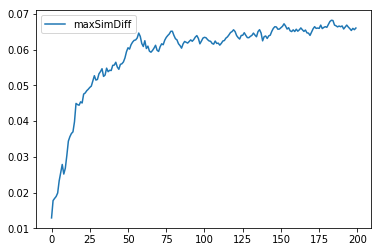

In [282]:
plt.plot(tempWeightScan_range, maxSimDiff_scan,label='maxSimDiff')
# plt.plot(tempWeightScan_range, threshold_s_scan,label='threshold_sim')
plt.legend()

### Stochastic gradient descent

### Training set of 7N

In [54]:
learning_parameters = {}
learning_parameters['learning_rate'] = 0.05
learning_parameters['save_root_folder'] = '/shared/blob_matching_atlas/training_weight'
learning_parameters['method'] = 'SGD'
learning_parameters['data_set'] = dataFolderName
learning_parameters['structure_name'] = '7N'
learning_parameters['training_props'] = ['area', 'eccentricity', 'compactness','moments_hu']
learning_parameters['numTrial'] = 2000
learning_parameters['stack'] = scan_parameters['stack']

In [ ]:
for tempStructure_name in structure_section_list.keys():
    learning_parameters['structure_name'] = tempStructure_name
    fun_optimize_weights_with_SGD(positive_training_data, negative_training_data, learning_parameters)

Structure Tz 0.000000 finished.
Structure Tz 0.050000 finished.


In [78]:
processed_structure = set(subprocess.check_output(['ls', '/shared/blob_matching_atlas/training_weight/MD589/NoCoords/']).splitlines())
all_structures_loaded = set(structure_section_list.keys())

In [81]:
# Unfinished
for temp in all_structures_loaded - processed_structure:
    print(temp, len(positive_training_data[temp]), len(negative_training_data[temp]))

('RtTg', 5341, 58005)
('IPC', 1124, 9444)
('IPA', 520, 2934)
('MPB', 1613, 14048)
('VLL', 22396, 213815)
('VTg', 1081, 8170)
('Cb', 17599, 400189)
('Sol', 3427, 28225)
('6N', 138, 1602)
('IPR', 1291, 8857)
('APT', 6929, 54696)
('Gr', 2067, 17748)
('MVe', 8183, 74111)
('SuVe', 5661, 66932)
('SC', 676195, 5615197)
('Pr5VL', 11943, 111971)
('IC', 434775, 3382076)
('SNR', 41491, 494860)
('LPB', 15471, 92899)
('IF', 263, 1313)


In [44]:
fun_optimize_weights_with_SGD(positive_training_data, negative_training_data, learning_parameters)

Structure 7N 0.000000 finished.
Structure 7N 0.050000 finished.
Structure 7N 0.100000 finished.
Structure 7N 0.150000 finished.
Structure 7N 0.200000 finished.
Structure 7N 0.250000 finished.
Structure 7N 0.300000 finished.
Structure 7N 0.350000 finished.
Structure 7N 0.400000 finished.
Structure 7N 0.450000 finished.
Structure 7N 0.500000 finished.
Structure 7N 0.550000 finished.
Structure 7N 0.600000 finished.
Structure 7N 0.650000 finished.
Structure 7N 0.700000 finished.
Structure 7N 0.750000 finished.
Structure 7N 0.800000 finished.
Structure 7N 0.850000 finished.
Structure 7N 0.900000 finished.
Structure 7N 0.950000 finished.


Folder created: /shared/blob_matching_atlas/training_weight/MD589/NoCoords/7N/SGD

In [188]:
def fun_ROC(positive_data, negative_data):
    """ Input: positive_data, negative_data are 1D numpy.array
    Output: ranges, posCum, negCum"""
    tempPosCum = []
    tempNegCum = []
    tempRanges = np.arange(0,1.05,0.05)
    for threshold_simu in tempRanges:
        tempPosCum.append(fun_similar_ratio(positive_data, threshold_simu=threshold_simu))
        tempNegCum.append(fun_similar_ratio(negative_data, threshold_simu=threshold_simu))
    return tempRanges, tempPosCum, tempNegCum

def fun_find_max(x,y, mode='returnAll'):
    x = np.array(x)
    y = np.array(y)
    maxY = np.max(y)
    maxX = x[y == maxY]
    if mode == 'returnAll':
        return maxX, maxY
    elif mode == 'returnFirst':
        if type(maxX) == np.ndarray:
            return maxX[0], maxY

def fun_find_max_similarity_difference(data_range, posCum, negCum):
    difference = np.array(posCum) - np.array(negCum)
    threshold_sim, maxSimDiff = fun_find_max(data_range, difference)
    return threshold_sim, maxSimDiff

def fun_SGD_score(weight, positive_training_data, negative_training_data):
    scan_range, posCum, negCum = fun_ROC(np.dot(positive_training_data, weight), np.dot(negative_training_data, weight) )
    _, maxSimDiff = fun_find_max_similarity_difference(scan_range, posCum, negCum)
    return maxSimDiff

# Gradient descent: compute gradient
def fun_gradient_descent(learning_vectors, initial_score, initial_weight,positive_data, negative_data, random_sample_num=None):
    tempMaxSimDiff = -1
    if random_sample_num is not None:
        num_positive_data = np.shape(positive_data)[0]
        num_negative_data = np.shape(negative_data)[0]
        positive_data_idx = np.arange(0, num_positive_data, dtype=np.int32)
        negative_data_idx = np.arange(0, num_negative_data, dtype=np.int32)
#     numStep = 0
    while True:
        if (random_sample_num is not None) and (num_positive_data > random_sample_num):
            selected_positive_idx = np.random.choice(positive_data_idx, size=random_sample_num, replace=False)
            positive_training_data = positive_data[selected_positive_idx]
        else:
            positive_training_data = positive_data
        if (random_sample_num is not None) and (num_negative_data > random_sample_num):
            selected_negative_idx = np.random.choice(negative_data_idx, size=random_sample_num, replace=False)
            negative_training_data = negative_data[selected_negative_idx]
        else:
            negative_training_data = negative_data
            
        tempMaxSimDiffList = []
        tempWeightList = []
        for learning_vector in learning_vectors:
            # Update weight, with nonegative normalized constrains
            tempWeight = initial_weight.copy() + learning_vector
            tempWeight[tempWeight<0] = 0
            tempWeight = tempWeight/np.sum(tempWeight)
            tempWeightList.append(tempWeight)
            tempMaxSimDiffList.append(fun_SGD_score(tempWeight, positive_training_data, negative_training_data))
        tempWeight, tempMaxSimDiff = fun_find_max(x=tempWeightList, y=tempMaxSimDiffList,mode='returnFirst')
        if tempMaxSimDiff > initial_score:
#             numStep +=1
            initial_score = tempMaxSimDiff
            initial_weight = tempWeight
        else:
#             print('Reach Local maximum. Break.')
            break
    return initial_score, initial_weight
    
def fun_get_learning_data(what, stack, data_set, structure_name, method, ext=None):
    LERANING_ROOT_PATH = '/shared/blob_matching_atlas/training_weight'
    if what=='weight':
        fn = 'weight.bp'
    elif what=='learning_parameters':
        fn = 'learning_parameters.pkl'
    elif what=='maxSimDiff':
        fn = 'maxSimDiff.bp'
    else:
        assert ext is not None, 'Please specify extension'
        fn = what + ext
    
    fp = os.path.join(LERANING_ROOT_PATH, stack, data_set, structure_name, method, fn)
    return fp


def fun_optimize_weights_with_SGD(positive_training_data, negative_training_data, learning_parameters):
    training_props = learning_parameters['training_props']
    structure_name = learning_parameters['structure_name']
    
    stack = learning_parameters['stack']
    
    save_root_folder = learning_parameters['save_root_folder']
    save_info_method = learning_parameters['method'] 
    save_data_set = learning_parameters['data_set']
    
    training_props = learning_parameters['training_props']
    numTrial = learning_parameters['numTrial']
    positive_data = positive_training_data[structure_name]
    negative_data = negative_training_data[structure_name]

    learning_rate = learning_parameters['learning_rate']

    sim_vector_length = 10
    temp_matrix = np.eye(sim_vector_length, dtype=np.float)
    learning_vectors = np.hstack(tuple([temp_matrix * learning_rate, temp_matrix * -learning_rate]))
    learning_vectors = np.split(learning_vectors,sim_vector_length*2, axis=1)

    report_times = numTrial/20
    data_maxSimDiff = []
    data_weight = []
    for idx in range(numTrial):
        if idx % report_times == 0:
            print('Structure %s %f finished.'%(structure_name, float(idx)/numTrial))
        weight = np.random.random(size=[sim_vector_length, 1])
        weight = weight/np.sum(weight)
        scan_range, posCum, negCum = fun_ROC(np.dot(positive_data, weight), np.dot(negative_data, weight) )
        threshold_sim, maxSimDiff = fun_find_max_similarity_difference(scan_range, posCum, negCum)
        optimized_maxSimDiff, optimized_weight = fun_gradient_descent(learning_vectors=learning_vectors,
                                                                      initial_score=maxSimDiff, 
                                                                      initial_weight=weight , 
                                                                      positive_data=positive_data, 
                                                                      negative_data=negative_data)
        data_maxSimDiff.append(optimized_maxSimDiff)
        data_weight.append(optimized_weight)

    # Save data    
    fp = os.path.join(save_root_folder, stack, save_data_set , structure_name, save_info_method)
    fun_create_folder(fp)
    bp.pack_ndarray_file(np.array(data_weight), filename= os.path.join(fp, 'weight.bp'))
    bp.pack_ndarray_file(np.array(data_maxSimDiff), filename=os.path.join(fp, 'maxSimDiff.bp'))
    save_pickle(learning_parameters, fp=os.path.join(fp, 'learning_parameters.pkl'))


In [203]:
structure_name = '7N'
positive_data = positive_training_data[structure_name]
negative_data = negative_training_data[structure_name]

In [204]:
learning_rate = 0.05;
sim_vector_length = 10
random_sample_num = learning_parameters['max_sample_num'] = 10000
temp_matrix = np.eye(sim_vector_length, dtype=np.float)
learning_vectors = np.hstack(tuple([temp_matrix * learning_rate, temp_matrix * -learning_rate]))
learning_vectors = np.split(learning_vectors,sim_vector_length*2, axis=1)

In [ ]:
# Initial similarity and weights:
numTrial = 2000
report_times = max(numTrial/20, 1)
data_maxSimDiff = []
data_weight = []
for idx in range(numTrial):
    if idx % report_times == 0:
        print('%f finished.'%(float(idx)/numTrial))
    weight = np.random.random(size=[sim_vector_length, 1])
    weight = weight/np.sum(weight)
    scan_range, posCum, negCum = fun_ROC(np.dot(positive_data, weight), np.dot(negative_data, weight) )
    threshold_sim, maxSimDiff = fun_find_max_similarity_difference(scan_range, posCum, negCum)
    optimized_maxSimDiff, optimized_weight = fun_gradient_descent(learning_vectors=learning_vectors,
                                                                  initial_score=maxSimDiff, 
                                                                  initial_weight=weight , 
                                                                  positive_data=positive_data, 
                                                                  negative_data=negative_data,random_sample_num=random_sample_num)
    data_maxSimDiff.append(optimized_maxSimDiff)
    data_weight.append(optimized_weight)

0.000000 finished.
0.050000 finished.
0.100000 finished.
0.150000 finished.
0.200000 finished.
0.250000 finished.
0.300000 finished.
0.350000 finished.
0.400000 finished.
0.450000 finished.
0.500000 finished.
0.550000 finished.
0.600000 finished.
0.650000 finished.


In [202]:
# tempBins = 100
# tempFeatureID = 9
# tempNormed = True
# plt.figure()
# plt.hist(negative_data[:,tempFeatureID],bins=tempBins, normed=tempNormed, alpha=0.3, label='Negative');
# plt.hist(positive_data[:,tempFeatureID],bins=tempBins, normed=tempNormed, alpha=0.3, label='Positive');
# plt.legend()

In [ ]:
plt.hist(typical_blob_props[''])

In [154]:
%prun [scipy.matrix.dot(negative_data, weight) for temp in range(10)]

In [155]:
%prun [np.dot(negative_data, weight) for temp in range(10)]

In [156]:
%prun [scipy.linalg.blas.dgemv(1, negative_data, weight) for idx in range(10)]

In [160]:
%prun [gemv(1, negative_data, weight) for idx in range(10)]

In [97]:
%prun fun_gradient_descent(learning_vectors=learning_vectors, initial_score=maxSimDiff, initial_weight=weight , positive_data=positive_data,  negative_data=negative_data)

In [158]:
gemv = scipy.linalg.get_blas_funcs('gemv', [negative_data, weight])

In [149]:
gemv(1, negative_data, weight)

array([ 0.67777451,  0.5251786 ,  0.70437148, ...,  0.28364669,
        0.36368237,  0.32034319])

In [99]:
%prun np.dot(negative_data, weight)

In [ ]:
fun_find_max(x=data_)

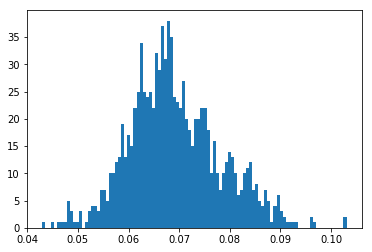

In [18]:
plt.hist(data_maxSimDiff, bins=100);

In [29]:
save_root_folder = '/shared/blob_matching_atlas/training_weight'
save_info_method = 'SGD'
save_data_set = dataFolderName
save_structure_name = structure_name
fp = os.path.join(save_root_folder, stack, save_data_set , save_structure_name, save_info_method)
fun_create_folder(fp)
bp.pack_ndarray_file(np.array(data_weight), filename= os.path.join(fp, 'weight.bp'))
bp.pack_ndarray_file(np.array(data_maxSimDiff), filename=os.path.join(fp, 'maxSimDiff.bp'))
save_pickle(scan_parameters, fp=os.path.join(fp, 'scan_parameters.pkl'))

Folder created: /shared/blob_matching_atlas/training_weight/NoCoords/MD589/7N/SGD

# Find good weight by stochastic initialization

In [ ]:
data_weight = []
data_maxSimDiff = []

In [61]:
# data_weight = list(data_weight)
# data_maxSimDiff = list(data_maxSimDiff)
numTry = 400
numTryPerTime = 5000
for tempTry in range(0, numTry):
    print(float(tempTry)/numTry)
    for temp in range(0,numTryPerTime):
        weight = np.random.random(size=[10,1])
        weight = weight / np.sum(weight)
        positive_weighted_similarity = np.dot(positive_training_data, weight)
        negative_weighted_similarity = np.dot(negative_training_data, weight)
        threshold_s, maxSimDiff = fun_max_similarity(positive_weighted_similarity, negative_weighted_similarity, plotFig=False)
        data_weight.append(weight.flatten())
        data_maxSimDiff.append(maxSimDiff)        

0.0
0.0025
0.005
0.0075
0.01
0.0125
0.015
0.0175
0.02
0.0225
0.025
0.0275
0.03
0.0325
0.035
0.0375
0.04
0.0425
0.045
0.0475
0.05
0.0525
0.055
0.0575
0.06
0.0625
0.065
0.0675
0.07
0.0725
0.075
0.0775
0.08
0.0825
0.085
0.0875
0.09
0.0925
0.095
0.0975
0.1
0.1025
0.105
0.1075
0.11
0.1125
0.115
0.1175
0.12
0.1225
0.125
0.1275
0.13
0.1325
0.135
0.1375
0.14
0.1425
0.145
0.1475
0.15
0.1525
0.155
0.1575
0.16
0.1625
0.165
0.1675
0.17
0.1725
0.175
0.1775
0.18
0.1825
0.185
0.1875
0.19
0.1925
0.195
0.1975
0.2
0.2025
0.205
0.2075
0.21
0.2125
0.215
0.2175
0.22
0.2225
0.225
0.2275
0.23
0.2325
0.235
0.2375
0.24
0.2425
0.245
0.2475
0.25
0.2525
0.255
0.2575
0.26
0.2625
0.265
0.2675
0.27
0.2725
0.275
0.2775
0.28
0.2825
0.285
0.2875
0.29
0.2925
0.295
0.2975
0.3
0.3025
0.305
0.3075
0.31
0.3125
0.315
0.3175
0.32
0.3225
0.325
0.3275
0.33
0.3325
0.335
0.3375
0.34
0.3425
0.345
0.3475
0.35
0.3525
0.355
0.3575
0.36
0.3625
0.365
0.3675
0.37
0.3725
0.375
0.3775
0.38
0.3825
0.385
0.3875
0.39
0.3925
0.395
0.3975
0.4


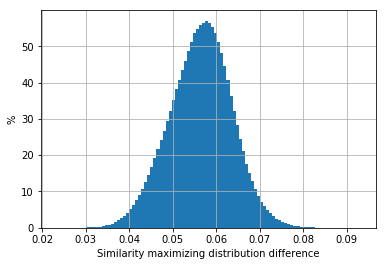

In [120]:
tempNumBin = 100
plt.hist(data_maxSimDiff, tempNumBin, normed=True);
plt.grid()
plt.xlabel('Similarity maximizing distribution difference')
plt.ylabel('%')
# plt.yscale('log')

In [100]:
data_weight = np.array(data_weight)
data_maxSimDiff = np.array(data_maxSimDiff)

In [101]:
tempGoodResult = data_weight[data_maxSimDiff > 0.09]
tempGoodResult

array([[ 0.10315924,  0.01021359,  0.18097468,  0.39090934,  0.05026666,
         0.17715124,  0.00091428,  0.02301327,  0.03374943,  0.02964826],
       [ 0.20574105,  0.02375814,  0.11356584,  0.38726311,  0.06430219,
         0.0552819 ,  0.02866969,  0.00077406,  0.04945738,  0.07118664]])

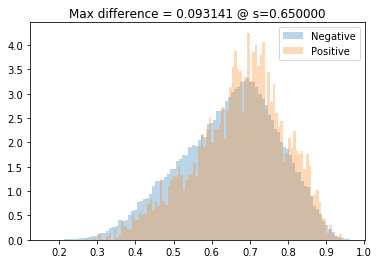

In [104]:
tempBinNum = 100
tempNormed = True
tempCumulated = False

# weight = np.array([[20,15,50]], dtype=np.float).T
# weight = weight / np.sum(weight)
weight = tempGoodResult[0,:]
positive_weighted_similarity = np.dot(positive_training_data, weight)
negative_weighted_similarity = np.dot(negative_training_data, weight)
threshold_s, maxSimDiff = fun_max_similarity(positive_weighted_similarity, negative_weighted_similarity, plotFig=False)
plt.figure()
plt.hist(negative_weighted_similarity,bins=tempBinNum,normed=tempNormed, alpha=0.3,cumulative=tempCumulated, label='Negative');
plt.hist(positive_weighted_similarity,bins=tempBinNum,normed=tempNormed,alpha=0.3,cumulative=tempCumulated, label='Positive');
plt.title('Max difference = %f @ s=%f'%(maxSimDiff, threshold_s))
plt.legend()

In [108]:
goodweight08 = data_weight[data_maxSimDiff>0.08]
goodweight07 = data_weight[data_maxSimDiff>0.07]

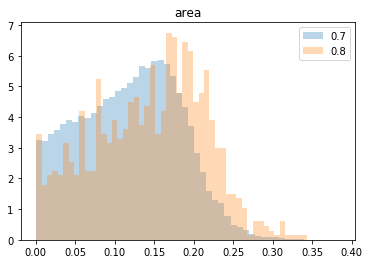

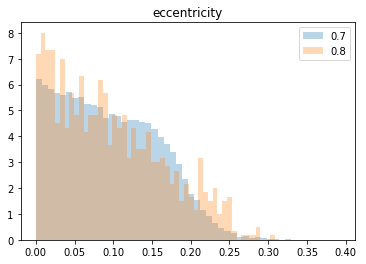

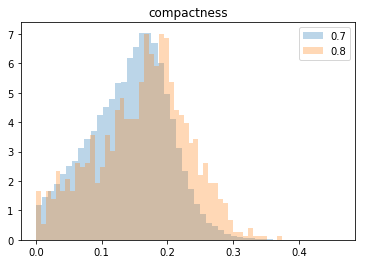

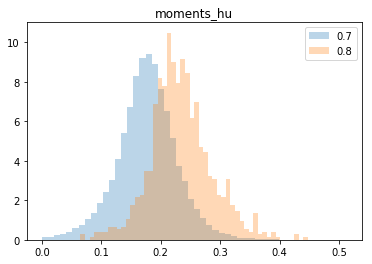

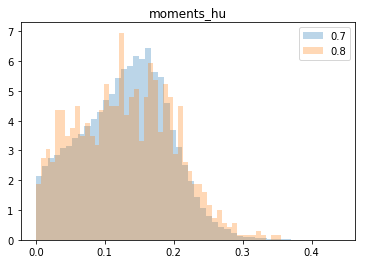

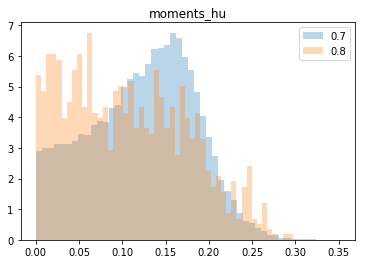

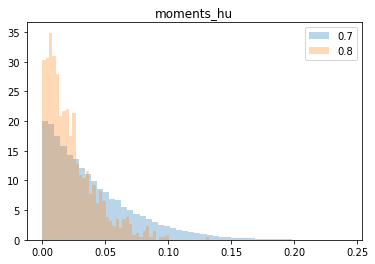

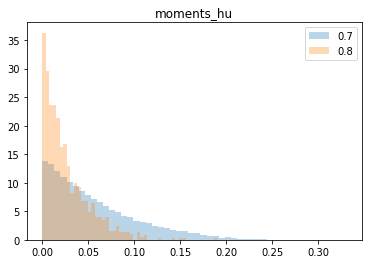

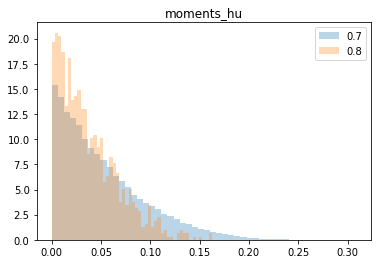

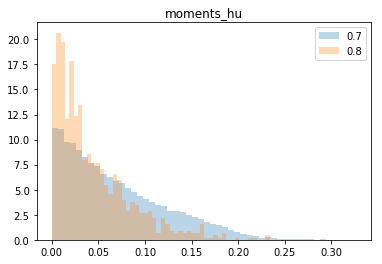

In [180]:
tempTitle = scan_parameters['training_props'] + ['moments_hu']*6
tempNormalized = True
for tempIdx in range(10):
    plt.figure()
    plt.hist(goodweight07[:, tempIdx], bins=50, normed=tempNormalized, alpha=0.3, label='0.7');
    plt.hist(goodweight08[:, tempIdx], bins=50, normed=tempNormalized, alpha=0.3, label='0.8');
    plt.title(tempTitle[tempIdx])
    plt.legend()

# Analysis

### Distribution differnece

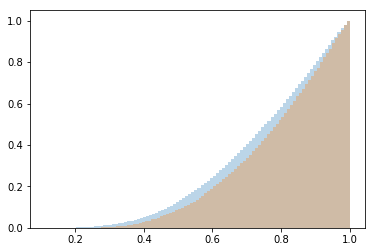

In [214]:
tempProp = 'compactness'
tempBinNum = 100
plt.hist(negative_similarity_prop[tempProp],bins=tempBinNum,normed=True, alpha=0.3,cumulative=True);
plt.hist(positive_similarity_prop[tempProp],bins=tempBinNum,normed=True,alpha=0.3,cumulative=True);

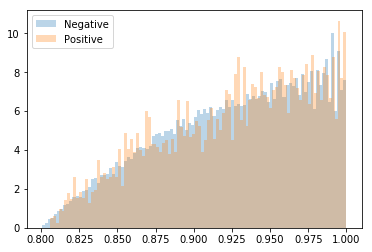

In [231]:
tempProp = 'area'
tempBinNum = 100
tempNormed = True
tempCumulated = False
plt.hist(negative_similarity_prop[tempProp],bins=tempBinNum,normed=tempNormed, alpha=0.3,cumulative=tempCumulated, label='Negative');
plt.hist(positive_similarity_prop[tempProp],bins=tempBinNum,normed=tempNormed,alpha=0.3,cumulative=tempCumulated, label='Positive');
plt.legend()